In [1]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = os.path.join("..", "..", "..", "data")  # document-wide constants are uppercase by convention

# 1 Linear Trends
## a: Read and plot the data



In [3]:
df = pd.read_csv(os.path.join(DATA_PATH, "maunaloa.csv"), index_col="DATE")
df.tail()

,CO2
DATE,
01/04/2004,375.86
01/05/2004,374.06
01/06/2004,374.24
01/07/2004,375.86
01/08/2004,377.48


<Axes: xlabel='DATE'>

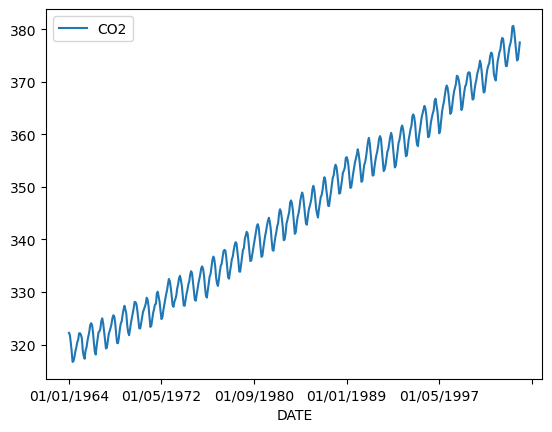

In [4]:
df.plot()

Time trend and seasonality are clearly visible.

## b: Estimation by OLS
First, we add a time trend to the data:

In [5]:
df = tsa.add_trend(df, trend="t")
df.tail()

,CO2,trend
DATE,,
01/04/2004,375.86,484.0
01/05/2004,374.06,485.0
01/06/2004,374.24,486.0
01/07/2004,375.86,487.0
01/08/2004,377.48,488.0


Then,

In [6]:
model = smf.ols(formula = "CO2 ~ trend", data = df).fit()  # intercept is included automatically
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.379e+04
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:47:08   Log-Likelihood:                -1128.7
No. Observations:                 488   AIC:                             2261.
Df Residuals:                     486   BIC:                             2270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    315.9809      0.222   1422.428      0.000     315.544     316.417
trend          0.1214      0.001    154.243      0.000       0.120       0.123
==============================================================================
Omnibus:                       18.125   Durbin-Watson:                   0.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.598
Skew:                          -0.049   Prob(JB):                       0.0136
Kurtosis:                       2.357   Cond. No.                         565.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both the intercept and the time trend are highly significant ($p$-values are essentially zero).

## c: Regression plots

eval_env: 1


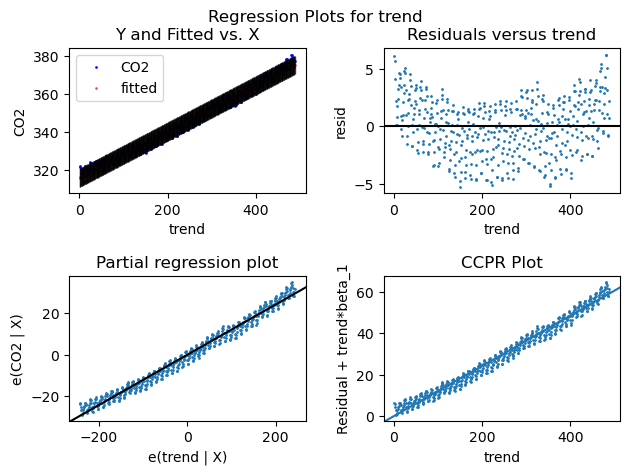

In [7]:
with mpl.rc_context():
    mpl.rc("lines", markersize=1)  # decrease the marker size for this plot
    sm.graphics.plot_regress_exog(model, "trend");

We observe that there is some structure in the residuals; a quadratic trend might be a better fit. Also, the seasonality is still clearly visible.

## d: Forecasting

Sept 1st, 2004 corresponds to $t=489$. Plugging this into the fitted model equation
$$\widehat{Y_t}=315.9809+0.1214\cdot t$$
yields
$$\widehat{Y_{489}}=315.9809+0.1214\cdot 489=375.35.$$
Alternatively,

In [8]:
model.predict(exog={"trend": 489})[0]

375.35797530885

## e: Quadratic Trend
We start by reading the data again and adding a quadratic trend.

In [9]:
df = pd.read_csv(os.path.join(DATA_PATH, "maunaloa.csv"), index_col="DATE")
df = tsa.add_trend(df, trend="ctt")
df.tail()

,CO2,const,trend,trend_squared
DATE,,,,
01/04/2004,375.86,1.0,484.0,234256.0
01/05/2004,374.06,1.0,485.0,235225.0
01/06/2004,374.24,1.0,486.0,236196.0
01/07/2004,375.86,1.0,487.0,237169.0
01/08/2004,377.48,1.0,488.0,238144.0


We then proceed analogously to before:

In [10]:
model = smf.ols(formula = "CO2 ~ trend + trend_squared", data = df).fit()  # intercept is included automatically
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.506e+04
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:47:08   Log-Likelihood:                -1071.7
No. Observations:                 488   AIC:                             2149.
Df Residuals:                     485   BIC:                             2162.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       318.4907      0.298   1070.291      0.000     317.906     319.075
trend             0.0907      0.003     32.271      0.000       0.085       0.096
trend_squared  6.285e-05   5.57e-06     11.292      0.000    5.19e-05    7.38e-05
==============================================================================
Omnibus:                       92.317   Durbin-Watson:                   0.318
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.426
Skew:                          -0.143   Prob(JB):                     2.23e-05
Kurtosis:                       2.014   Cond. No.                     3.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The quadratic term is significant as well.

eval_env: 1


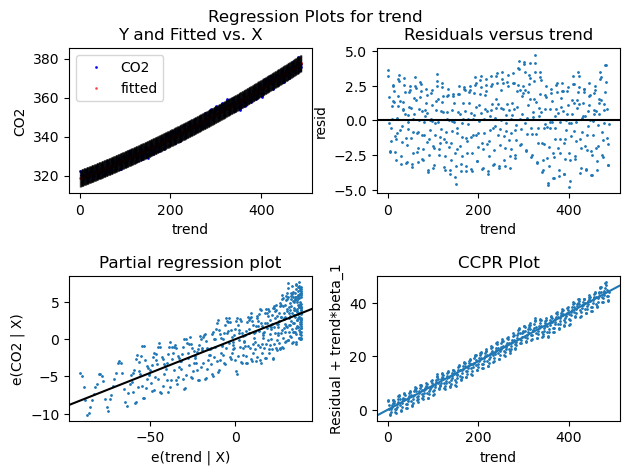

In [11]:
with mpl.rc_context():
    mpl.rc("lines", markersize=1)  # decrease the marker size for this plot
    sm.graphics.plot_regress_exog(model, "trend");

Eyeballing, this looks like a better fit than the linear model. Prediction:
$$\widehat{Y_t}=318.4907+0.0907\cdot t + 6.285 \cdot 10^{-5} \cdot t^2$$
yields
$$\widehat{Y_{489}}=318.4907+0.0907\cdot 489 + 6.285 \cdot 10^{-5}\cdot 489^2=377.87.$$
Alternatively,

In [12]:
model.predict(exog={"trend": 489, "trend_squared": 489**2})[0]

377.8677375956789

## f: Exponential trend

We first need to convert the dependent variable to logs. This can be done by adding a new column to the dataframe, or directly in the regression specification, as follows:

In [13]:
df = pd.read_csv(os.path.join(DATA_PATH, "maunaloa.csv"), index_col="DATE")
df = tsa.add_trend(df, trend="t")
model = smf.ols(formula = "np.log(CO2) ~ trend", data = df).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(CO2)   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 2.677e+04
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:47:09   Log-Likelihood:                 1753.4
No. Observations:                 488   AIC:                            -3503.
Df Residuals:                     486   BIC:                            -3494.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7585      0.001   9518.803      0.000       5.757       5.760
trend          0.0004   2.14e-06    163.621      0.000       0.000       0.000
==============================================================================
Omnibus:                       38.362   Durbin-Watson:                   0.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.220
Skew:                          -0.129   Prob(JB):                     0.000817
Kurtosis:                       2.205   Cond. No.                         565.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The following gives us the estimated parameters in higher precision:

In [14]:
model.params

Intercept    5.758471
trend        0.000351
dtype: float64

The estimated parameters of our exponential trend
$$
F_t = \beta_0\cdot\beta_1^t
$$
are $\widehat{\beta_0}=\exp(5.758471)=316.86$ and $\widehat{\beta_1}=\exp(0.000351)=1.000351$,
implying that atmospheric CO2 increases by 0.035\% a month, or $1.035^{12}-1=0.42$\% a year. The forecast for 2005M1 is
$$
\widehat{Y_{489}}=316.86\cdot 1.000351^{489}=376.18.
$$
Alternatively, we can use the model directly to predict $\log Y_{489}$ first, and then take the exponential:
$$
\widehat{\log Y_{489}} = 5.758471 + 0.000351 \cdot 489 = 5.93011,
$$
so that 
$$
\widehat{Y_{489}}=\exp(5.93011) = 376.2.
$$
Or we can simply do

In [15]:
np.exp(model.predict(exog={"trend": 489})[0])

376.15610170390715

# 2 Moving Averages
## a: Manually

In [16]:
df.head()

,CO2,trend
DATE,,
01/01/1964,322.23,1.0
01/02/1964,321.89,2.0
01/03/1964,320.44,3.0
01/04/1964,318.70,4.0
01/05/1964,316.70,5.0


We obtain
$$ (322.23+321.89+320.44)/3 = 321.52.$$

## b: In Python

In Python, moving average can be computed as follows.

In [17]:
df["CO2"].rolling(3, center=True).mean()

DATE
01/01/1964           NaN
01/02/1964    321.520000
01/03/1964    320.343333
01/04/1964    318.613333
01/05/1964    317.423333
                 ...    
01/04/2004    375.903333
01/05/2004    374.720000
01/06/2004    374.720000
01/07/2004    375.860000
01/08/2004           NaN
Name: CO2, Length: 488, dtype: float64

Same result as the manual calculation. However, we want the 12th order moving average now. For convenient plotting, we add it to our existing dataframe.

In [18]:
df["CO2_MA"] = df["CO2"].rolling(12, center=True).mean()

Finally, we plot the result.

<Axes: xlabel='DATE'>

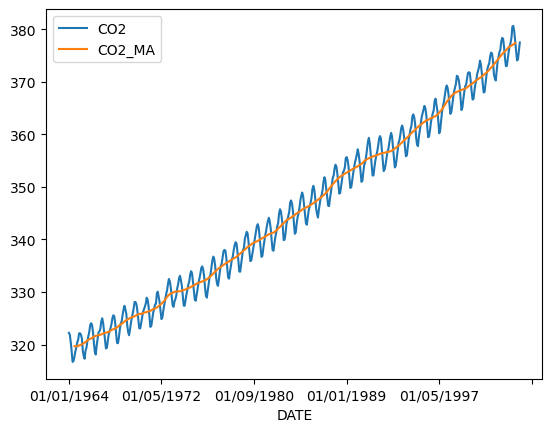

In [19]:
df[["CO2", "CO2_MA"]].plot()

# 3. Seasonality
## a: With a full set of dummies

We start by adding a column containing the month to the dataframe, where months are numbered 1 through 12. We also add a trend as before.

In [20]:
df = pd.read_csv(os.path.join(DATA_PATH, "maunaloa.csv"), index_col="DATE")
df = tsa.add_trend(df, trend="t")
df["MONTH"] = df.index
df["MONTH"] = pd.to_datetime(df["MONTH"], dayfirst=True).dt.month
df.tail()

,CO2,trend,MONTH
DATE,,,
01/04/2004,375.86,484.0,4
01/05/2004,374.06,485.0,5
01/06/2004,374.24,486.0,6
01/07/2004,375.86,487.0,7
01/08/2004,377.48,488.0,8


We then estimate the model by OLS. Note that instead of including `MONTH` as a regressor, we want to encode it as dummies. This can be done as follows in statsmodels (the `C` is for "categorical"). Note that we are also removing the intercept (`-1`).

In [21]:
model = smf.ols(formula = "CO2 ~ trend + C(MONTH) - 1", data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     6992.
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:47:09   Log-Likelihood:                -819.14
No. Observations:                 488   AIC:                             1664.
Df Residuals:                     475   BIC:                             1719.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(MONTH)[1]    318.9866      0.229   1392.505      0.000     318.536     319.437
C(MONTH)[2]    318.3172      0.229   1388.444      0.000     317.867     318.768
C(MONTH)[3]    316.7740      0.229   1380.577      0.000     316.323     317.225
C(MONTH)[4]    314.6676      0.230   1370.267      0.000     314.216     315.119
C(MONTH)[5]    312.8102      0.230   1361.054      0.000     312.359     313.262
C(MONTH)[6]    312.6764      0.230   1359.346      0.000     312.224     313.128
C(MONTH)[7]    313.9132      0.230   1363.590      0.000     313.461     314.366
C(MONTH)[8]    315.0841      0.230   1367.538      0.000     314.631     315.537
C(MONTH)[9]    315.9162      0.232   1363.274      0.000     315.461     316.372
C(MONTH)[10]   316.5799      0.232   1365.035      0.000     316.124     317.036
C(MONTH)[11]   317.3224      0.232   1367.128      0.000     316.866     317.778
C(MONTH)[12]   318.4901      0.232   1371.045      0.000     318.034     318.947
trend            0.1215      0.000    287.809      0.000       0.121       0.122
==============================================================================
Omnibus:                       39.602   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.180
Skew:                           0.735   Prob(JB):                     9.38e-11
Kurtosis:                       2.668   Cond. No.                     1.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The forecast for August 1st, 2004 is

In [22]:
model.predict()[-1]

374.39675788218614

We can confirm the forecast manually by plugging 488 (the index of the last observation) into the estimated equation:
$$ \widehat{Y}_{488} = 315.0841 + 488 \cdot 0.121542 = 374.396596$$
Finally, the plot:

eval_env: 1


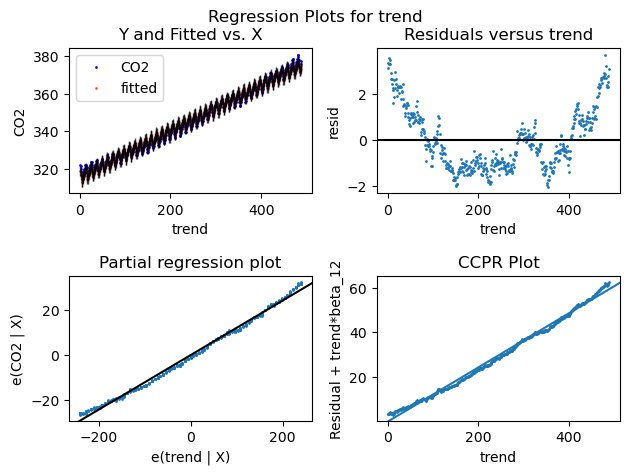

In [23]:
with mpl.rc_context():
    mpl.rc("lines", markersize=1)  # decrease the marker size for this plot
    sm.graphics.plot_regress_exog(model, "trend");

The fit is very good, although we should have maybe stuck with the quadratic trend.

## b: With intercept
We now repeat the analysis, but include an intercept in the model. This will automatically remove one of the dummies.

In [24]:
model = smf.ols(formula = "CO2 ~ trend + C(MONTH)", data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     6992.
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:47:09   Log-Likelihood:                -819.14
No. Observations:                 488   AIC:                             1664.
Df Residuals:                     475   BIC:                             1719.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        318.9866      0.229   1392.505      0.000     318.536     319.437
C(MONTH)[T.2]     -0.6693      0.290     -2.306      0.022      -1.240      -0.099
C(MONTH)[T.3]     -2.2126      0.290     -7.624      0.000      -2.783      -1.642
C(MONTH)[T.4]     -4.3190      0.290    -14.881      0.000      -4.889      -3.749
C(MONTH)[T.5]     -6.1764      0.290    -21.281      0.000      -6.747      -5.606
C(MONTH)[T.6]     -6.3102      0.290    -21.741      0.000      -6.880      -5.740
C(MONTH)[T.7]     -5.0734      0.290    -17.480      0.000      -5.644      -4.503
C(MONTH)[T.8]     -3.9025      0.290    -13.446      0.000      -4.473      -3.332
C(MONTH)[T.9]     -3.0704      0.292    -10.514      0.000      -3.644      -2.497
C(MONTH)[T.10]    -2.4067      0.292     -8.241      0.000      -2.981      -1.833
C(MONTH)[T.11]    -1.6642      0.292     -5.699      0.000      -2.238      -1.090
C(MONTH)[T.12]    -0.4965      0.292     -1.700      0.090      -1.070       0.077
trend              0.1215      0.000    287.809      0.000       0.121       0.122
==============================================================================
Omnibus:                       39.602   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.180
Skew:                           0.735   Prob(JB):                     9.38e-11
Kurtosis:                       2.668   Cond. No.                     3.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notice how the dummy for January is now missing; the intercept (318.986) now corresponds to CO2 in January, and every other month is measured in deviation from this; i.e., the dummy for February shows that CO2 is on average 0.6603 ppm lower in February than in January.

The forecast remains the same:

In [25]:
model.predict()[-1]

374.39675788221354

Our manual calculation changes a bit though, because we have to include the intercept:
$$ \widehat{Y}_{488} = 318.9866 -3.9025 + 488 \cdot 0.121542 = 374.396596$$
The result remains the same, of course.